In [28]:
from pathlib import Path
import matplotlib.pyplot as plt


In [29]:
from experiments import BasicSetup

In [30]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config.yaml"
)

basic_setup = BasicSetup(config_path)
basic_setup.run()


[-5.01554184e-02  7.63242044e-01  1.00000000e+00  9.89179653e-01
  1.00000000e+00  9.48473163e-01  9.13404228e-01  6.48220605e-01
  1.05485596e+00  1.00000000e+00  9.61451591e-01  9.33925373e-01
 -1.77574432e-01  5.27043214e-01  9.01772143e-01  1.00000000e+00
  1.11674437e+00  9.16737969e-01  9.86800307e-01  9.70019192e-01
  5.52143120e-01 -3.07874994e+00 -2.28164273e-01  1.99944187e-02
  4.67818616e-01  2.41808353e-01 -1.62671297e-01 -2.82249132e+01
 -1.08471524e+01 -2.19810742e+00 -7.70890731e-01  5.36637469e-02
 -2.61728227e-01  1.11993742e-01 -3.26392324e-01 -3.35213139e+00
 -3.13181738e-01 -1.04475838e+01  4.32979856e-01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  9.99772996e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  9.99868022e-01  1.00003667e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00]
[[0.74711698 0.01560876 0.         ... 0

In [31]:
x_est, res, rank, s = basic_setup.reg.fit()

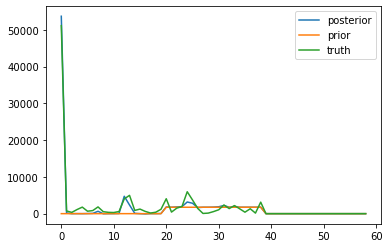

In [32]:
plt.plot(x_est * basic_setup.emissions.get_absolute(), label="posterior")
plt.plot(basic_setup.emissions.prior_absolute, label="prior")
plt.plot(basic_setup.emissions.truth_absolute, label="truth")
plt.legend()

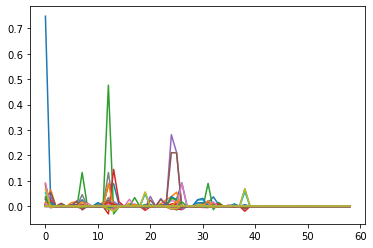

In [33]:
averaging_kernel = basic_setup.reg.get_averaging_kernel()
for i in range(averaging_kernel.shape[0]):
    kernel = averaging_kernel[i]
    plt.plot(kernel)


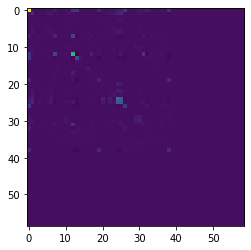

In [34]:
plt.imshow(basic_setup.reg.get_averaging_kernel())

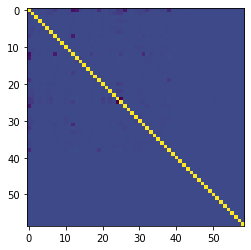

In [35]:
plt.imshow(basic_setup.reg.get_correlation())

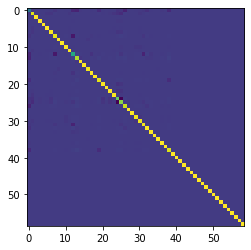

In [36]:
plt.imshow(basic_setup.reg.get_posterior_covariance())